<a href="https://colab.research.google.com/github/22400378/yena/blob/main/quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# [1-1] 데이터프레임으로 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/서울대기오염.csv")
df.head()

,날짜,측정소명,미세먼지,초미세먼지,오존,이산화질소\nNO2 (ppm),일산화탄소\nCO (ppm),아황산가스\nSO2(ppm)
0,전체,평균,42.0,25.0,0.025,0.028,0.5,0.004
1,2019-12-31,평균,26.0,15.0,0.022,0.016,0.4,0.003
2,2019-12-31,강남구,22.0,14.0,0.025,0.014,0.4,0.003
3,2019-12-31,강동구,27.0,19.0,0.019,0.020,0.4,0.003
4,2019-12-31,강북구,31.0,17.0,0.022,0.022,0.4,0.002


In [69]:
# [1-2] 분석변수만 추출 및 컬럼명 변경: date, district, pm10, pm25

df = df[["날짜", "측정소명", "미세먼지", "초미세먼지"]]
df.columns = ["date", "district", "pm10", "pm25"]

df.head()

,date,district,pm10,pm25
0,전체,평균,42.0,25.0
1,2019-12-31,평균,26.0,15.0
2,2019-12-31,강남구,22.0,14.0
3,2019-12-31,강동구,27.0,19.0
4,2019-12-31,강북구,31.0,17.0


In [70]:
# [1-3] 결측치 확인 및 제거

df = df.dropna(subset=["date", "pm10", "pm25"])

In [71]:
# [1-4] 자료형 변환: 문자형 → 날짜형, 실수형 등

df["date"] = pd.to_datetime(df["date"], errors="coerce")

<ipython-input-71-13a39e201155>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")


In [72]:
# [2-1] month, day 파생변수 생성

df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df.head()

,date,district,pm10,pm25,month,day
0,NaT,평균,42.0,25.0,NaN,NaN
1,2019-12-31,평균,26.0,15.0,12.0,31.0
2,2019-12-31,강남구,22.0,14.0,12.0,31.0
3,2019-12-31,강동구,27.0,19.0,12.0,31.0
4,2019-12-31,강북구,31.0,17.0,12.0,31.0


In [73]:
# [2-2] 계절(season) 변수 생성

def get_season(month):
    if month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "autumn"
    else:
        return "winter"

df["season"] = df["month"].apply(get_season)

df.head()

,date,district,pm10,pm25,month,day,season
0,NaT,평균,42.0,25.0,NaN,NaN,winter
1,2019-12-31,평균,26.0,15.0,12.0,31.0,winter
2,2019-12-31,강남구,22.0,14.0,12.0,31.0,winter
3,2019-12-31,강동구,27.0,19.0,12.0,31.0,winter
4,2019-12-31,강북구,31.0,17.0,12.0,31.0,winter


In [74]:
# [4-1] 전체 데이터 기준 PM10 평균

avg_pm10 = df["pm10"].mean()
print(f"전체 PM10 평균: {avg_pm10:.2f}")

전체 PM10 평균: 41.76


In [76]:
# [5-1] PM10 최댓값이 발생한 날짜, 구 출력

max_pm10_row = df.loc[df["pm10"].idxmax()]
print(f"PM10 최댓값: {max_pm10_row['pm10']}")
print(f"날짜: {max_pm10_row['date']}, 구: {max_pm10_row['district']}")

PM10 최댓값: 228.0
날짜: 2019-03-05 00:00:00, 구: 강북구


In [77]:
# [6-1] 각 구별 pm10 평균 계산

district_avg = df.groupby("district")["pm10"].mean().reset_index(name="avg_pm10")
print(district_avg)

   district   avg_pm10
0       강남구  40.230986
1       강동구  42.061972
2       강북구  44.950685
3       강서구  46.504132
4       관악구  49.083601
5       광진구  41.920330
6       구로구  41.793296
7       금천구  38.454545
8       노원구  39.887363
9       도봉구  37.986301
10     동대문구  38.924471
11      동작구  43.256198
12      마포구  47.086154
13     서대문구  40.958904
14      서초구  43.206044
15      성동구  44.898072
16      성북구  43.780282
17      송파구  39.950685
18      양천구  47.695055
19     영등포구  44.252078
20      용산구  34.052342
21      은평구  41.829132
22      종로구  37.692308
23       중구  37.564384
24      중랑구  37.417178
25       평균  41.415301


In [78]:
# [6-2] 상위 5개 구만 출력 (컬럼: district, avg_pm10)

top5_districts = district_avg.sort_values(by="avg_pm10", ascending=False).head(5)
print(top5_districts)

   district   avg_pm10
4       관악구  49.083601
18      양천구  47.695055
12      마포구  47.086154
3       강서구  46.504132
2       강북구  44.950685


In [79]:
# [7-1] 계절별 평균 pm10, pm25 동시 출력

season_avg = df.groupby("season")[["pm10", "pm25"]].mean().reset_index()
season_avg.columns = ["season", "avg_pm10", "avg_pm25"]
print(season_avg)

   season   avg_pm10   avg_pm25
0  autumn  31.118349  15.703211
1  spring  54.088629  31.558110
2  summer  26.321307  18.087861
3  winter  54.676244  33.656518


In [80]:
# [7-2] 평균값 기준 오름차순 정렬 (컬럼: season, avg_pm10, avg_pm25)

season_avg = season_avg.sort_values(by=["avg_pm10", "avg_pm25"])
print(season_avg)

   season   avg_pm10   avg_pm25
2  summer  26.321307  18.087861
0  autumn  31.118349  15.703211
1  spring  54.088629  31.558110
3  winter  54.676244  33.656518


In [81]:
# [8-1] pm10 값을 기준으로 등급 분류 (good/normal/bad/worse)

def convert_pm_grade(val):
    if val <= 30:
        return "good"
    elif val <= 80:
        return "normal"
    elif val <= 150:
        return "bad"
    else:
        return "worse"

df["pm_grade"] = df["pm10"].apply(convert_pm_grade)
print(df[["pm10", "pm_grade"]].head())

   pm10 pm_grade
0  42.0   normal
1  26.0     good
2  22.0     good
3  27.0     good
4  31.0   normal


In [82]:
# [8-2] 전체 데이터 기준 등급별 빈도, 비율 계산 (컬럼: pm_grade, n, pct)

grade_dist = df["pm_grade"].value_counts().reset_index()
grade_dist.columns = ["pm_grade", "n"]
grade_dist["pct"] = (grade_dist["n"] / grade_dist["n"].sum()) * 100
print(grade_dist)

  pm_grade     n        pct
0   normal  5006  54.060475
1     good  3543  38.261339
2      bad   627   6.771058
3    worse    84   0.907127


In [83]:
# [9-1] 구별 등급 분포 중 'good' 빈도와 전체 대비 비율 계산

good_ratio = df[df["pm_grade"] == "good"].groupby("district").size().reset_index(name="n")
total_per_district = df.groupby("district").size().reset_index(name="total")

good_pct = pd.merge(good_ratio, total_per_district, on="district")
good_pct["pct"] = (good_pct["n"] / good_pct["total"]) * 100

print(good_pct[["district", "n", "total", "pct"]])

   district    n  total        pct
0       강남구  132    355  37.183099
1       강동구  127    355  35.774648
2       강북구  119    365  32.602740
3       강서구  116    363  31.955923
4       관악구   85    311  27.331190
5       광진구  134    364  36.813187
6       구로구  150    358  41.899441
7       금천구  161    363  44.352617
8       노원구  148    364  40.659341
9       도봉구  162    365  44.383562
10     동대문구  146    331  44.108761
11      동작구  114    363  31.404959
12      마포구   96    325  29.538462
13     서대문구  144    365  39.452055
14      서초구  137    364  37.637363
15      성동구  133    363  36.639118
16      성북구  106    355  29.859155
17      송파구  147    365  40.273973
18      양천구  100    364  27.472527
19     영등포구  130    361  36.011080
20      용산구  196    363  53.994490
21      은평구  138    357  38.655462
22      종로구  162    364  44.505495
23       중구  169    365  46.301370
24      중랑구  150    326  46.012270
25       평균  141    366  38.524590


In [84]:
# [9-2] 비율(pct) 기준 내림차순 정렬 후 상위 5개 구만 출력 (컬럼: district, n, pct)

top5_good = good_pct.sort_values(by="pct", ascending=False).head(5)
print(top5_good[["district", "n", "pct"]])

   district    n        pct
20      용산구  196  53.994490
23       중구  169  46.301370
24      중랑구  150  46.012270
22      종로구  162  44.505495
9       도봉구  162  44.383562


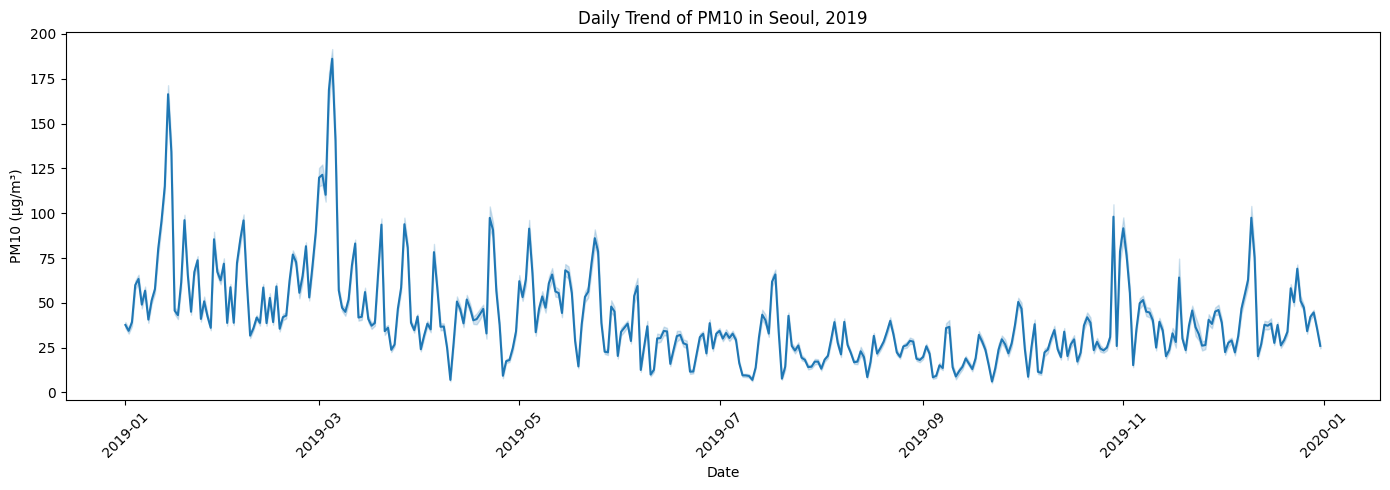

In [88]:
# [10-1] x축: date, y축: pm10 (선그래프)

plt.figure(figsize=(14, 5))
sns.lineplot(data=df, x="date", y="pm10")

# [10-2] 제목: 'Daily Trend of PM10 in Seoul, 2019'

plt.title("Daily Trend of PM10 in Seoul, 2019")
plt.xlabel("Date")
plt.ylabel("PM10 (μg/m³)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

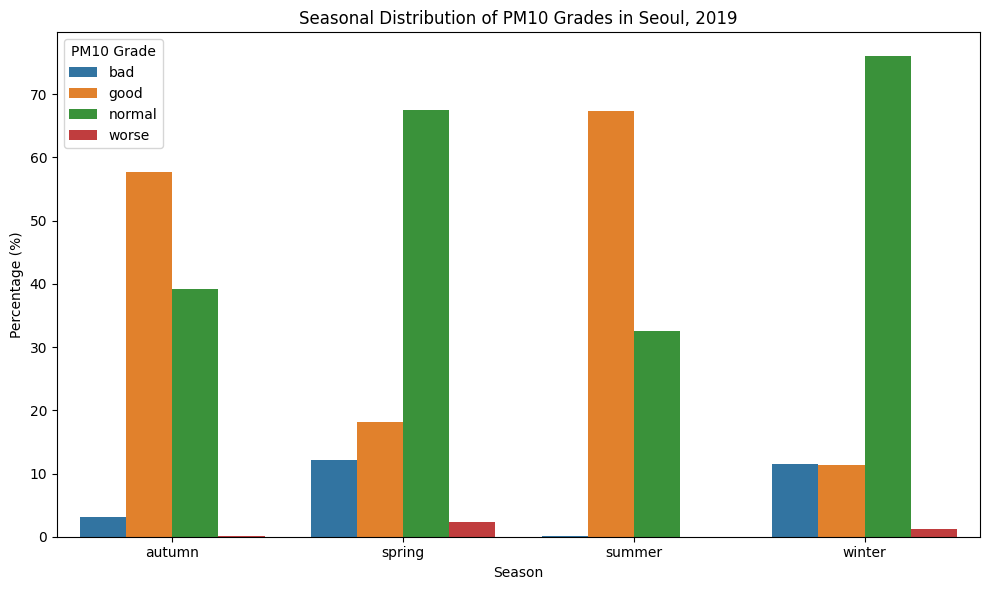

In [92]:
# [11-1] x축: season, y축: pct, fill: pm_grade (막대그래프 - seaborn barplot)

season_grade = df.groupby(["season", "pm_grade"]).size().reset_index(name="count")
season_total = df.groupby("season").size().reset_index(name="total")
season_pct = pd.merge(season_grade, season_total, on="season")
season_pct["pct"] = (season_pct["count"] / season_pct["total"]) * 100

# [11-2] 범례: good, normal, bad, worse

plt.figure(figsize=(10, 6))
sns.barplot(data=season_pct, x="season", y="pct", hue="pm_grade")

# [11-3] 제목: 'Seasonal Distribution of PM10 Grades in Seoul, 2019'

plt.title("Seasonal Distribution of PM10 Grades in Seoul, 2019")
plt.ylabel("Percentage (%)")
plt.xlabel("Season")
plt.legend(title="PM10 Grade")
plt.tight_layout()
plt.show()

In [94]:
df.to_csv("card_output.csv", index=False)

from google.colab import files
files.download("card_output.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>